In [2]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_pickle('dates.pkl')

In [25]:
dt_index = df[['date']].astype('datetime64[ns]').set_index('date')

### NOS

In [37]:
df_nos_ship = pd.read_excel('raw_data/nos/naicsvsp.xls', header=None)
df_nos_ship.columns = ['ticker', 
                       'year', 
                      1,
                      2,
                      3,
                      4,
                      5,
                      6,
                      7,
                      8,
                      9,
                      10,
                      11,
                      12]
df_nos_ship.head()

,ticker,year,1,2,3,4,5,6,7,8,9,10,11,12
0,AMTMVS,1992,227721,228860,238604,239877.0,243732.0,245693.0,245608.0,242874.0,244894.0,243190.0,246901.0,248199.0
1,AMTMVS,1993,247812,249517,250346,248681.0,251798.0,253388.0,248759.0,249283.0,252679.0,256449.0,255017.0,256087.0
2,AMTMVS,1994,259834,261152,261862,263499.0,266632.0,268116.0,271246.0,273778.0,272898.0,276184.0,279548.0,286731.0
3,AMTMVS,1995,286480,288455,284903,289640.0,285641.0,288557.0,287862.0,289737.0,295286.0,292655.0,291561.0,300609.0
4,AMTMVS,1996,286897,282115,294562,295365.0,299775.0,303281.0,300234.0,301541.0,305155.0,301294.0,308575.0,307211.0


In [50]:
df_nos_mdm = df_nos_ship[df_nos_ship['ticker'] == 'AMDMVS'].drop('ticker', axis=1)
df_nos_mt = df_nos_mdm.melt(id_vars=['year'])

In [56]:
df_nos_mt.head()

,year,variable,value
0,1992,1,117958.0
1,1993,1,129525.0
2,1994,1,141207.0
3,1995,1,157247.0
4,1996,1,156881.0


In [60]:
def get_knowledge_dt(year, month):
    if month != 12:
        return dt.date(year, month + 1, 25)
    else:
        return dt.date(year + 1, 1, 25)

In [61]:
df_nos_mt['knowledge_dt'] = df_nos_mt.apply(lambda row: 
                                            get_knowledge_dt(row['year'], row['variable']),
                                            axis=1)
                                            

In [71]:
df_ship_res = df_nos_mt.set_index('knowledge_dt')[['value']].rename(columns={'value': 
                                                                             'shipments'}).sort_index()
df_ship_res.head()

,shipments
knowledge_dt,
1992-02-25,117958.0
1992-03-25,119895.0
1992-04-25,124897.0
1992-05-25,126174.0
1992-06-25,127638.0


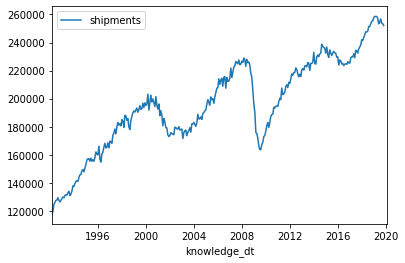

In [73]:
df_ship_res.plot(); plt.show()

In [67]:
df_nos_orders = pd.read_excel('raw_data/nos/naicsnop.xls')
df_nos_orders.columns = ['ticker', 
                         'year', 
                          1,
                          2,
                          3,
                          4,
                          5,
                          6,
                          7,
                          8,
                          9,
                          10,
                          11,
                          12]
df_nos_orders.head()

,ticker,year,1,2,3,4,5,6,7,8,9,10,11,12
0,AMTMNO,1993,239924.0,247176,245506,244703,245194,249521,245765,246562,245731,251656.0,247827.0,250057.0
1,AMTMNO,1994,257125.0,256624,257190,260006,263419,267027,267694,269994,270377,275087.0,276477.0,282738.0
2,AMTMNO,1995,279692.0,284915,282195,283370,282955,281900,281269,285979,293326,287568.0,287704.0,297684.0
3,AMTMNO,1996,285822.0,277940,298862,290320,298700,299606,298909,293231,302015,301595.0,309537.0,300179.0
4,AMTMNO,1997,300765.0,310604,307465,313694,308733,315090,318485,319106,318687,319565.0,334896.0,315121.0


In [68]:
df_order_mdm = df_nos_orders[df_nos_orders['ticker'] == 'AMDMNO'].drop('ticker', axis=1)
df_order_mt = df_order_mdm.melt(id_vars=['year'])

In [69]:
df_order_mt['knowledge_dt'] = df_order_mt.apply(lambda row: 
                                            get_knowledge_dt(row['year'], row['variable']),
                                            axis=1)
                                            

In [74]:
df_order_res = df_order_mt.set_index('knowledge_dt')[['value']].rename(columns={'value': 
                                                                             'orders'}).sort_index()
df_order_res.head()

,orders
knowledge_dt,
1992-02-25,NaN
1992-03-25,114535.0
1992-04-25,120025.0
1992-05-25,124470.0
1992-06-25,125822.0


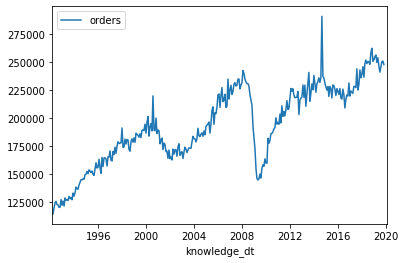

In [75]:
df_order_res.plot()

### Older NOS data

#### Shipments

In [79]:
df_old_ship = pd.read_excel('raw_data/nos/vsp.xls', header=None)
df_old_ship.columns = ['ticker', 
                         'year', 
                          1,
                          2,
                          3,
                          4,
                          5,
                          6,
                          7,
                          8,
                          9,
                          10,
                          11,
                          12]
df_old_ship.head()

,ticker,year,1,2,3,4,5,6,7,8,9,10,11,12
0,A20AVS,1958,1253,1296,1306,1274.0,1325.0,1355.0,1322.0,1389.0,1337.0,1278.0,1475.0,1320.0
1,A20AVS,1959,1372,1331,1359,1306.0,1364.0,1315.0,1292.0,1305.0,1259.0,1259.0,1299.0,1247.0
2,A20AVS,1960,1338,1212,1277,1343.0,1329.0,1325.0,1376.0,1319.0,1340.0,1355.0,1324.0,1344.0
3,A20AVS,1961,1336,1361,1361,1376.0,1326.0,1311.0,1326.0,1258.0,1334.0,1368.0,1314.0,1380.0
4,A20AVS,1962,1347,1383,1335,1388.0,1346.0,1402.0,1374.0,1375.0,1440.0,1398.0,1497.0,1401.0


In [81]:
df_old_mdm = df_old_ship[df_old_ship['ticker'] == 'AMDMVS'].drop('ticker', axis=1)
df_old_mt = df_old_mdm.melt(id_vars=['year'])
df_old_mt.head()

,year,variable,value
0,1958,1,13960.0
1,1959,1,14769.0
2,1960,1,16844.0
3,1961,1,14311.0
4,1962,1,16941.0


In [82]:
df_old_mt['knowledge_dt'] = df_old_mt.apply(lambda row: 
                                            get_knowledge_dt(row['year'], row['variable']),
                                            axis=1)
                                            

In [92]:
df_old_res = df_old_mt.set_index('knowledge_dt')[['value']].rename(columns={'value': 
                                                                             'old_shipments'}).sort_index()
df_old_res.tail(20)

,old_shipments
knowledge_dt,
2000-06-25,214890.0
2000-07-25,217645.0
2000-08-25,212142.0
2000-09-25,214018.0
2000-10-25,214165.0
2000-11-25,209833.0
2000-12-25,207715.0
2001-01-25,206588.0
2001-02-25,201519.0


### both shipping

In [93]:
df_ship_combined = df_old_res.join(df_ship_res, how='outer')

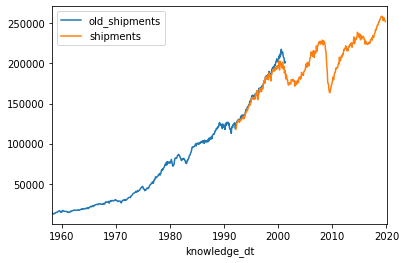

In [96]:
df_ship_combined.plot();plt.show()

In [99]:
df_ship_combined['filled_shipments'] = df_ship_combined.apply(lambda row: 
                                                              row['old_shipments'] 
                                                              if pd.isnull(row['shipments'])
                                                             else row['shipments'],
                                                             axis=1)

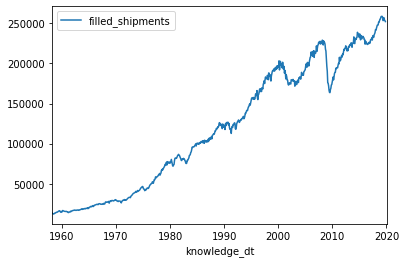

In [102]:
df_ship_combined[['filled_shipments']].plot(); plt.show()

## Old orders

In [103]:
df_old_order = pd.read_excel('raw_data/nos/nop.xls', header=None)
df_old_order.columns = ['ticker', 
                         'year', 
                          1,
                          2,
                          3,
                          4,
                          5,
                          6,
                          7,
                          8,
                          9,
                          10,
                          11,
                          12]
df_old_order.head()

,ticker,year,1,2,3,4,5,6,7,8,9,10,11,12
0,A32MNO,1958,NaN,725,712,717.0,741.0,734.0,815.0,819.0,880.0,873.0,918.0,852.0
1,A32MNO,1959,898.0,935,955,948.0,931.0,930.0,966.0,973.0,876.0,913.0,899.0,933.0
2,A32MNO,1960,1082.0,1073,851,891.0,902.0,877.0,848.0,876.0,892.0,840.0,798.0,926.0
3,A32MNO,1961,752.0,773,889,842.0,879.0,961.0,940.0,942.0,951.0,933.0,946.0,873.0
4,A32MNO,1962,893.0,899,902,1000.0,934.0,945.0,918.0,957.0,934.0,970.0,982.0,992.0


In [107]:
df_old_mdm_order = df_old_order[df_old_order['ticker'] == 'AMDMNO'].drop('ticker', axis=1)
df_old_mt_order = df_old_mdm_order.melt(id_vars=['year'])
df_old_mt_order.head()

,year,variable,value
0,1958,1,NaN
1,1959,1,15647.0
2,1960,1,15507.0
3,1961,1,14092.0
4,1962,1,17469.0


In [108]:
df_old_mt_order['knowledge_dt'] = df_old_mt_order.apply(lambda row: 
                                            get_knowledge_dt(row['year'], row['variable']),
                                            axis=1)

In [109]:
df_old_res_order = df_old_mt_order.set_index('knowledge_dt')[['value']].rename(columns={'value': 
                                                                             'old_orders'}).sort_index()
df_old_res_order.tail(20)

,old_orders
knowledge_dt,
2000-06-25,221388.0
2000-07-25,241748.0
2000-08-25,209877.0
2000-09-25,215860.0
2000-10-25,220651.0
2000-11-25,206060.0
2000-12-25,212391.0
2001-01-25,215289.0
2001-02-25,199560.0


### Both Orders

In [110]:
df_order_combined = df_order_res.join(df_old_res_order, how='outer')

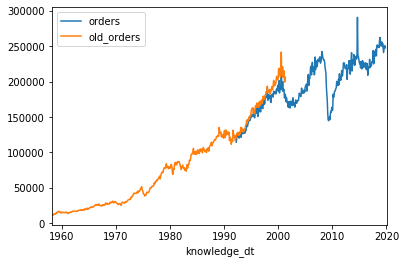

In [111]:
df_order_combined.plot(); plt.show()

In [113]:
df_order_combined['filled_orders'] = df_order_combined.apply(lambda row: 
                                                              row['old_orders'] 
                                                              if pd.isnull(row['orders'])
                                                             else row['orders'],
                                                             axis=1)

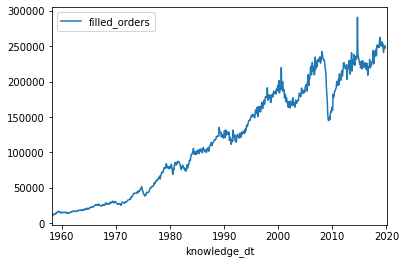

In [116]:
df_order_combined[['filled_orders']].plot();plt.show()

### final DF

In [124]:
df_comb_final = df_order_combined[['filled_orders']].join(df_ship_combined[['filled_shipments']]).dropna()

In [126]:
df_comb_final['nos'] = np.log(df_comb_final['filled_orders'] / df_comb_final['filled_shipments'])

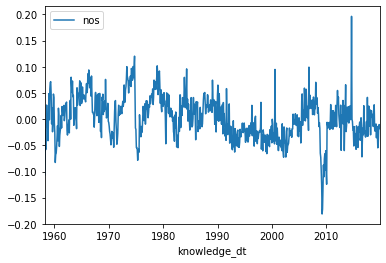

In [127]:
df_comb_final[['nos']].plot()

In [128]:
df_comb_final[['nos']].to_pickle('out_data/NOS.pkl')

### CPI

In [28]:
df_cpi = pd.read_csv('raw_data/cpi/CPIAUCSL.csv', parse_dates=['DATE'], index_col='DATE')
df_cpi.tail()

,CPIAUCSL
DATE,
2019-05-01,255.155
2019-06-01,255.305
2019-07-01,256.161
2019-08-01,256.300
2019-09-01,256.358


In [131]:
df_cpi_out = dt_index.join(df_cpi.resample('D').ffill(), how='left').dropna()

In [137]:
df_cpi_out['year'] = df_cpi_out.reset_index()['date'].apply(lambda x: x.year).values

In [139]:
df_cpi_out.groupby('year').size()

year
1990    143
1991    253
1992    254
1993    253
1994    252
1995    252
1996    254
1997    253
1998    252
1999    252
2000    252
2001    248
2002    252
2003    252
2004    252
2005    252
2006    251
2007    251
2008    253
2009    252
2010    252
2011    252
2012    250
2013    252
2014    252
2015    252
2016    252
2017    251
2018    251
2019    168
dtype: int64

In [132]:
df_cpi_out / df_cpi_out.sh

,CPIAUCSL
date,
1990-06-08,129.9
1990-06-11,129.9
1990-06-12,129.9
1990-06-13,129.9
1990-06-14,129.9
...,...
2019-08-26,256.3
2019-08-27,256.3
2019-08-28,256.3


In [31]:
df_cpi_out.to_pickle('out_data/CPI.pkl')

### Short Interest

In [34]:
df_si = pd.read_csv('raw_data/si/FINRA-FNYX_MNKD.csv', parse_dates=['Date'], index_col='Date').sort_index()
df_si.head()

,ShortVolume,ShortExemptVolume,TotalVolume
Date,,,
2013-04-01,102793.0,0.0,131746.0
2013-04-02,76593.0,0.0,92582.0
2013-04-03,121932.0,0.0,157882.0
2013-04-04,76659.0,0.0,94772.0
2013-04-05,53614.0,0.0,80414.0
